In [49]:
import os

# Ruta al archivo de credenciales JSON
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'SMBeta/driven-atrium-400420-8c586d3661be.json'


In [36]:
from google.cloud import bigquery
import numpy
# Crea un cliente de BigQuery
client = bigquery.Client()

# Ejecuta una consulta
query = """
SELECT *
FROM `driven-atrium-400420.sod_co_bi_reportsmanagement_dev.ventas_totales_diarias`
"""

# Ahora puedes usar la variable "query" en tu código para ejecutar la consulta en BigQuery.
query_job = client.query(query)

# Recupera los resultados
results = query_job.result()

# Itera sobre los resultados
for row in results:
    print(row)
len(row)



Row((datetime.date(2023, 10, 29), 0, 36472495.75, 41597985, 29561331.47), {'fecha': 0, 'FRECUENCIA': 1, 'VENTA_NETA': 2, 'FACTURAS_TOTAL': 3, 'TICKET_PROMEDIO_TOTAL': 4})
Row((datetime.date(2023, 10, 29), 0, 46579704.16, 35075145, 25162682.56), {'fecha': 0, 'FRECUENCIA': 1, 'VENTA_NETA': 2, 'FACTURAS_TOTAL': 3, 'TICKET_PROMEDIO_TOTAL': 4})
Row((datetime.date(2023, 10, 29), 0, 6394620.82, 19719996, 64949355.97), {'fecha': 0, 'FRECUENCIA': 1, 'VENTA_NETA': 2, 'FACTURAS_TOTAL': 3, 'TICKET_PROMEDIO_TOTAL': 4})
Row((datetime.date(2023, 10, 29), 0, 98585413.84, 51661511, 99712706.56), {'fecha': 0, 'FRECUENCIA': 1, 'VENTA_NETA': 2, 'FACTURAS_TOTAL': 3, 'TICKET_PROMEDIO_TOTAL': 4})
Row((datetime.date(2023, 10, 29), 0, 31605811.76, 60817122, 7498330.46), {'fecha': 0, 'FRECUENCIA': 1, 'VENTA_NETA': 2, 'FACTURAS_TOTAL': 3, 'TICKET_PROMEDIO_TOTAL': 4})
Row((datetime.date(2023, 10, 29), 0, 5818751.84, 7322286, 447198.27), {'fecha': 0, 'FRECUENCIA': 1, 'VENTA_NETA': 2, 'FACTURAS_TOTAL': 3, 'TICKET_P

5

In [37]:
from google.cloud import bigquery
import pandas as pd

# Crea un cliente de BigQuery
client = bigquery.Client()

# Ejecuta una consulta
query = """
SELECT *
FROM `driven-atrium-400420.sod_co_bi_reportsmanagement_dev.ventas_totales_diarias`
"""

# Ahora puedes usar la variable "query" en tu código para ejecutar la consulta en BigQuery.
query_job = client.query(query)

# Recupera los resultados
results = query_job.result()

# Define el nombre de las columnas
column_names = ['fecha', 'FRECUENCIA', 'VENTA_NETA', 'FACTURAS_TOTAL', 'TICKET_PROMEDIO_TOTAL']

# Convierte los resultados en un DataFrame
data = [list(row.values()) for row in results]
df = pd.DataFrame(data, columns=column_names)

# Asegúrate de que las fechas estén formateadas correctamente como objetos de fecha
df['fecha'] = pd.to_datetime(df['fecha'])



In [38]:
df

,fecha,FRECUENCIA,VENTA_NETA,FACTURAS_TOTAL,TICKET_PROMEDIO_TOTAL
0,2023-10-29,0,36472495.75,41597985,29561331.47
1,2023-10-29,0,46579704.16,35075145,25162682.56
2,2023-10-29,0,6394620.82,19719996,64949355.97
3,2023-10-29,0,98585413.84,51661511,99712706.56
4,2023-10-29,0,31605811.76,60817122,7498330.46
...,...,...,...,...,...
10561,2023-11-19,10,91515958.53,76111934,906133.84
10562,2023-11-19,10,27596315.77,22447732,65135120.72
10563,2023-11-19,10,78382706.37,64899770,30414837.51
10564,2023-11-19,10,22336680.70,34505097,9036238.28


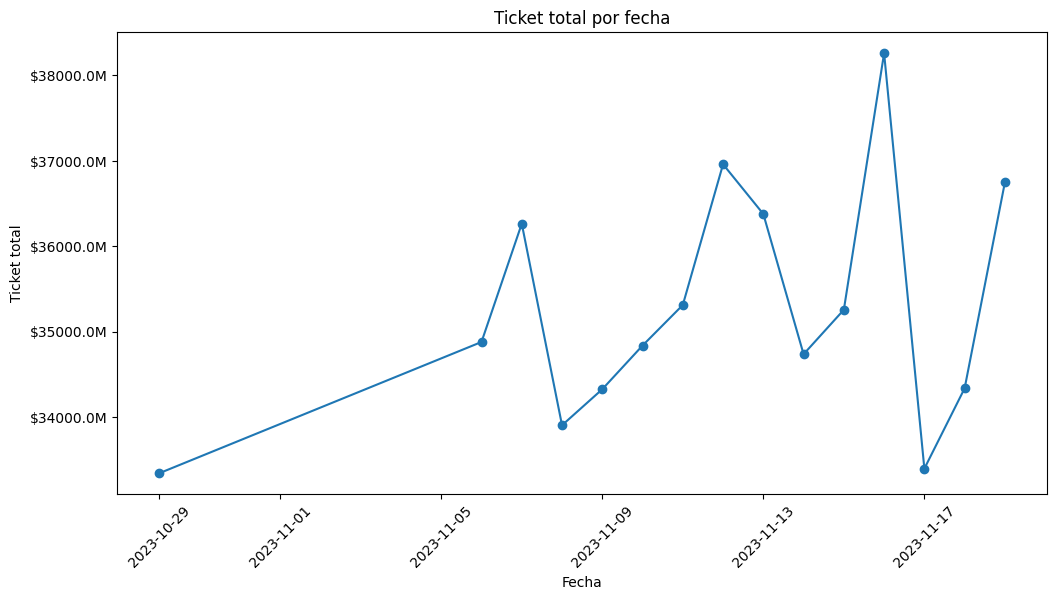

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Asegúrate de que el DataFrame esté ordenado por la columna 'fecha'
df = df.sort_values('fecha')

# Agrupa los datos por fecha y suma los valores de 'TICKET_PROMEDIO_TOTAL'
df_grouped = df.groupby('fecha')['TICKET_PROMEDIO_TOTAL'].sum().reset_index()

# Función para formatear los valores del eje y en millones
def millions_formatter(x, pos):
    return f'${x/1e6:.1f}M'

# Crea la gráfica
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['fecha'], df_grouped['TICKET_PROMEDIO_TOTAL'], marker='o', linestyle='-')
plt.title('Ticket total por fecha')
plt.xlabel('Fecha')
plt.ylabel('Ticket total')
plt.grid(False)  # Quita la cuadrícula

# Formatea el eje y con la función personalizada
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Muestra la gráfica
plt.show()


In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Asegúrate de que el DataFrame esté ordenado por la columna 'fecha'
df = df.sort_values('fecha')

# Agrupa los datos por fecha y suma los valores de 'TICKET_PROMEDIO_TOTAL'
df_grouped = df.groupby('fecha')['TICKET_PROMEDIO_TOTAL'].sum().reset_index()

# Función para formatear los valores del eje y en millones
def millions_formatter(x, pos):
    return f'${x/1e6:.1f}M'

# Crea la gráfica
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['fecha'], df_grouped['TICKET_PROMEDIO_TOTAL'], marker='o', linestyle='-')
plt.title('TICKET_PROMEDIO_TOTAL por Fecha')
plt.xlabel('Fecha')
plt.ylabel('TICKET_PROMEDIO_TOTAL')
plt.grid(False)  # Quita la cuadrícula

# Formatea el eje y con la función personalizada
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Guarda la gráfica como un archivo PNG
plt.savefig('grafica.png')

# Cierra la gráfica
plt.close()

# En este punto, la gráfica se ha guardado como 'grafica.png'


In [53]:
tabla = "ventas_semana_digital"

In [54]:
 # Crea un cliente de BigQuery
client = bigquery.Client()

    # Construye la consulta utilizando el nombre de la tabla especificado en la URL
query = f"SELECT * FROM `driven-atrium-400420.sod_co_bi_reportsmanagement_dev.{tabla}`"

    # Ejecuta la consulta en BigQuery
query_job = client.query(query)

    # Recupera los resultados
results = query_job.result()

    # Define el nombre de las columnas
column_names = ['fecha', 'FRECUENCIA', 'VENTA_NETA', 'FACTURAS_TOTAL', 'TICKET_PROMEDIO_TOTAL']

    # Convierte los resultados en un DataFrame
data = [list(row.values()) for row in results]
df = pd.DataFrame(data, columns=column_names)

    # Asegúrate de que las fechas estén formateadas correctamente como objetos de fecha
df['fecha'] = pd.to_datetime(df['fecha'])

In [55]:
df

,fecha,FRECUENCIA,VENTA_NETA,FACTURAS_TOTAL,TICKET_PROMEDIO_TOTAL
0,2023-10-23,0,35726466.36,20853863,36086068.87
1,2023-10-23,0,32474031.12,63950901,40833831.93
2,2023-10-23,0,61946687.57,36131131,31521629.38
3,2023-10-23,0,54176629.16,20854756,22452808.34
4,2023-10-23,0,87194183.43,95392075,11290927.20
...,...,...,...,...,...
15184,2023-11-19,10,87550805.11,99726049,75608632.60
15185,2023-11-19,10,34392437.29,91996457,67776251.06
15186,2023-11-19,10,32669181.06,93130314,81549914.42
15187,2023-11-19,10,56758530.16,7151433,10009729.82
